In [284]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D , Dense, MaxPool2D, Dropout, Flatten
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import *
from matplotlib import image
import h5py
import os
from keras.preprocessing import image

In [402]:
normal = os.listdir(r"C:\Users\kush.parihar\Desktop\major project\train\Normal")
covid = os.listdir(r"C:\Users\kush.parihar\Desktop\major project\train\COVID")
pneumonia = os.listdir(r"C:\Users\kush.parihar\Desktop\major project\train\Viral Pneumonia")

In [403]:
print("No. of normal images are:",len(normal))
print("No. of covid-19 images are:",len(covid))
print("No. of pneumonia images are:",len(pneumonia))

No. of normal images are: 5667
No. of covid-19 images are: 4263
No. of pneumonia images are: 2034


C:\Users\kush.parihar\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: >

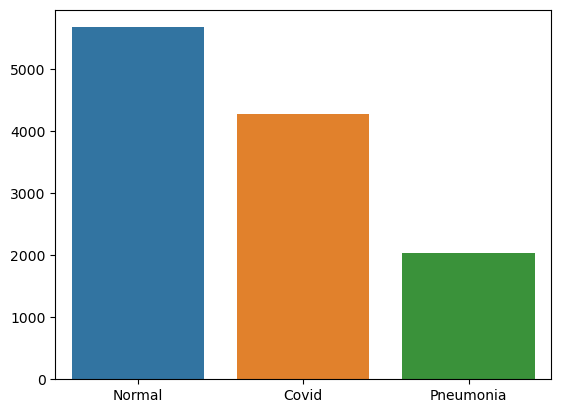

In [404]:
sns.barplot(x=["Normal","Covid","Pneumonia"],y=[len(normal),len(covid),len(pneumonia)])

Normal Image


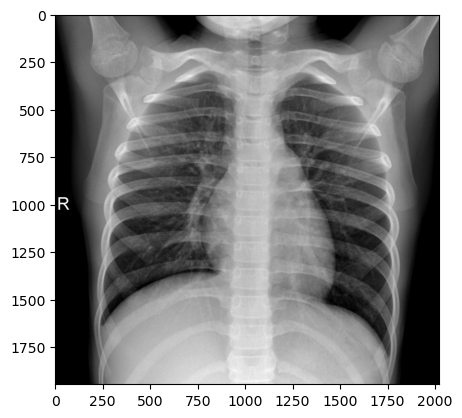

In [18]:
normal_image = load_img(r"C:\Users\kush.parihar\Desktop\major project\train\Normal\NORMAL2-IM-0892-0001.jpeg")
print("Normal Image")
plt.imshow(normal_image)
plt.show()

Covid-19 Image


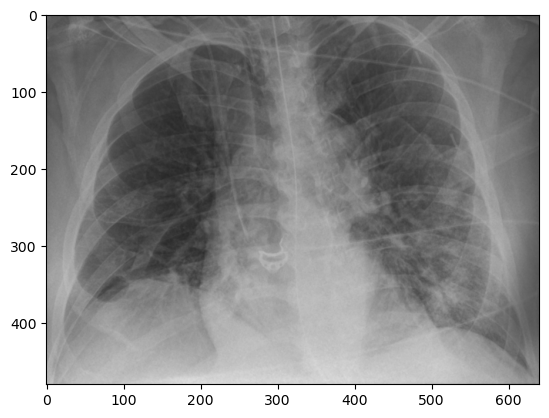

In [19]:
covid_image = load_img(r"C:\Users\kush.parihar\Desktop\major project\train\COVID\covid190084.png")
print("Covid-19 Image")
plt.imshow(covid_image)
plt.show()

Pneumonia Image


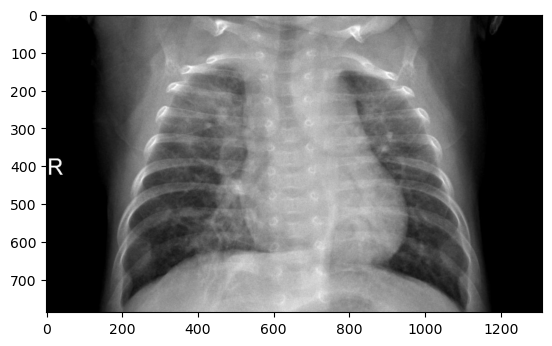

In [20]:
pneumonia_image = load_img(r"C:\Users\kush.parihar\Desktop\major project\train\Viral Pneumonia\person438_virus_889.jpeg")
print("Pneumonia Image")
plt.imshow(pneumonia_image)
plt.show()

In [405]:
train_path = r"C:\Users\kush.parihar\Desktop\major project\train"
test_path =  r"C:\Users\kush.parihar\Desktop\major project\test"
val_path = r"C:\Users\kush.parihar\Desktop\major project\val"

In [406]:
train_datagen = ImageDataGenerator( 
                rescale = 1/255.0,
                rotation_range = 20,
                horizontal_flip = True,
                vertical_flip = True,
                fill_mode = 'nearest'
                )

In [407]:
valid_datagen = ImageDataGenerator(
                rescale = 1/255.0,
                rotation_range = 20,
                horizontal_flip=True,
                vertical_flip = True,
                fill_mode = 'nearest'
                )

In [408]:
test_datagen = ImageDataGenerator(
            rescale = 1/255.0)
batch_size = 16

In [409]:
train_generator = train_datagen.flow_from_directory(
            train_path,
            target_size =(256,256),
            batch_size = batch_size,
            class_mode = 'categorical')

Found 11849 images belonging to 3 classes.


In [410]:
train_generator.class_indices

{'COVID': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [411]:
valid_generator = valid_datagen.flow_from_directory(
                    val_path,
                    target_size = (256,256),
                    batch_size = batch_size,
                    class_mode = 'categorical')

Found 251 images belonging to 3 classes.


In [412]:
valid_generator.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [413]:
test_generator = test_datagen.flow_from_directory(
                  test_path,
                    target_size = (256,256),
                    batch_size = batch_size,
                    class_mode ='categorical')

Found 66 images belonging to 3 classes.


In [414]:
test_generator.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

**CONVOLUTIONAL NEURAL NETWORK**

In [15]:
model1=Sequential()
model1.add(Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3)))

model1.add(Conv2D(64,(3,3),activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.3))

model1.add(Conv2D(128,(3,3),activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.3))

model1.add(Conv2D(256,(3,3),activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.3))

model1.add(Conv2D(256,(3,3),activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.3))

model1.add(Flatten())
model1.add(Dense(64,activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(3,activation='softmax'))

C:\Users\kush.parihar\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [16]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 252, 252, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 126, 126, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 126, 126, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 124, 124, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 60, 60, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 30, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     3,211,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,190,019 (15.98 MB)

 Trainable params: 4,190,019 (15.98 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model1.compile(loss='categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [30]:
early_stop = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15)

In [19]:
model1.fit(train_generator,validation_data = valid_generator,epochs = 15,batch_size=16,verbose=1,callbacks = [early_stop])

Epoch 1/50


C:\Users\kush.parihar\AppData\Local\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


741/741 ━━━━━━━━━━━━━━━━━━━━ 1428s 2s/step - accuracy: 0.4934 - loss: 0.9732 - val_accuracy: 0.4980 - val_loss: 0.8226
Epoch 2/50
741/741 ━━━━━━━━━━━━━━━━━━━━ 1458s 2s/step - accuracy: 0.5849 - loss: 0.7692 - val_accuracy: 0.6375 - val_loss: 0.7927
Epoch 3/50
741/741 ━━━━━━━━━━━━━━━━━━━━ 1407s 2s/step - accuracy: 0.6352 - loss: 0.7042 - val_accuracy: 0.6892 - val_loss: 0.7975
Epoch 4/50
741/741 ━━━━━━━━━━━━━━━━━━━━ 1401s 2s/step - accuracy: 0.6530 - loss: 0.6848 - val_accuracy: 0.7570 - val_loss: 0.6715
Epoch 5/50
741/741 ━━━━━━━━━━━━━━━━━━━━ 9599s 13s/step - accuracy: 0.6605 - loss: 0.6746 - val_accuracy: 0.7410 - val_loss: 0.6850
Epoch 6/50
741/741 ━━━━━━━━━━━━━━━━━━━━ 1386s 2s/step - accuracy: 0.6890 - loss: 0.6403 - val_accuracy: 0.6574 - val_loss: 0.7868
Epoch 7/50
741/741 ━━━━━━━━━━━━━━━━━━━━ 1416s 2s/step - accuracy: 0.6936 - loss: 0.6196 - val_accuracy: 0.8526 - val_loss: 0.5155
Epoch 8/50
741/741 ━━━━━━━━━━━━━━━━━━━━ 1409s 2s/step - accuracy: 0.7198 - loss: 0.5937 - val_accura

KeyboardInterrupt: 

In [21]:
model1.history.history

{'accuracy': [0.5306776762008667,
  0.597856342792511,
  0.6365094184875488,
  0.6574394702911377,
  0.6704363226890564,
  0.6889188885688782,
  0.7011561989784241,
  0.719048023223877,
  0.7200607657432556,
  0.7484176158905029,
  0.7490927577018738,
  0.7615832686424255,
  0.7636931538581848,
  0.7660561800003052,
  0.77804034948349],
 'loss': [0.8716652393341064,
  0.7528402805328369,
  0.706676185131073,
  0.6812517642974854,
  0.6624960899353027,
  0.6397884488105774,
  0.6107495427131653,
  0.5923092365264893,
  0.5787095427513123,
  0.5535897612571716,
  0.5465789437294006,
  0.5298449397087097,
  0.5216270685195923,
  0.5125942826271057,
  0.4951452612876892],
 'val_accuracy': [0.49800798296928406,
  0.6374502182006836,
  0.6892430186271667,
  0.7569721341133118,
  0.7410358786582947,
  0.6573705077171326,
  0.8525896668434143,
  0.7928286790847778,
  0.804780900478363,
  0.788844645023346,
  0.8326693177223206,
  0.7928286790847778,
  0.8406374454498291,
  0.824701189994812,
 

In [24]:
losses = pd.DataFrame(model1.history.history)

In [26]:
val_losses = losses.drop(['accuracy','val_accuracy'],axis=1)

<Axes: >

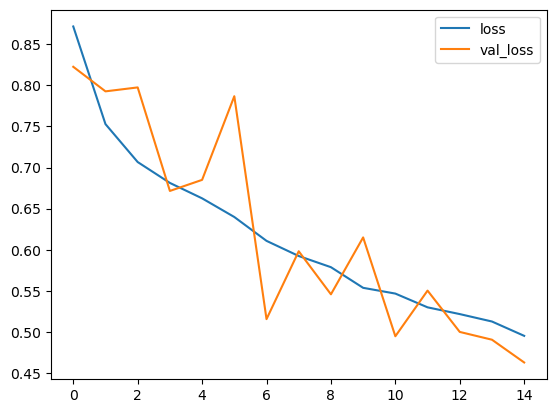

In [37]:
val_losses.plot()

In [29]:
val_acc = losses.drop(['loss','val_loss'],axis=1)

<Axes: >

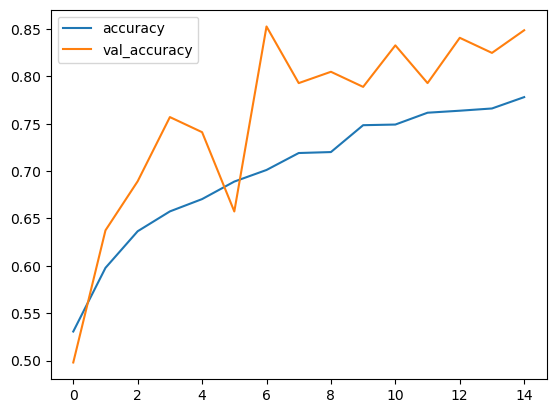

In [39]:
val_acc.plot()

In [35]:
print("The accuaracy of CNN model:",val_acc['val_accuracy'].max() *100)
print("The loss of CNN model:",val_losses['val_loss'].min()*100)

The accuaracy of CNN model: 85.25896668434143
The loss of CNN model: 46.27339541912079


***VGG16 MODEL***

In [33]:
from keras.applications.vgg16 import VGG16

In [34]:
vgg16_model = VGG16(input_shape=(256,256,3), include_top = False, weights = 'imagenet',pooling='max')

In [35]:
vgg16_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d_1          │ (None, 512)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model2 = Sequential()
model2.add(vgg16_model)
model2.add(Flatten())

model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(32, activation ='relu'))
model2.add(Dense(16, activation ='relu'))
model2.add(Dense(3, activation = 'softmax'))

for layer in vgg16_model.layers:
    layer.trainable = False

In [37]:
model2.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [38]:
model2.fit(train_generator,validation_data = valid_generator, epochs = 6, batch_size=16, verbose=1,callbacks = [early_stop])

Epoch 1/15
741/741 ━━━━━━━━━━━━━━━━━━━━ 4138s 6s/step - accuracy: 0.6426 - loss: 0.7654 - val_accuracy: 0.7649 - val_loss: 0.5314
Epoch 2/15
741/741 ━━━━━━━━━━━━━━━━━━━━ 2184s 3s/step - accuracy: 0.8192 - loss: 0.4328 - val_accuracy: 0.7769 - val_loss: 0.5407
Epoch 3/15
741/741 ━━━━━━━━━━━━━━━━━━━━ 2336s 3s/step - accuracy: 0.8395 - loss: 0.3870 - val_accuracy: 0.7610 - val_loss: 0.5841
Epoch 4/15
741/741 ━━━━━━━━━━━━━━━━━━━━ 2348s 3s/step - accuracy: 0.8470 - loss: 0.3692 - val_accuracy: 0.7371 - val_loss: 0.6632
Epoch 5/15
741/741 ━━━━━━━━━━━━━━━━━━━━ 2232s 3s/step - accuracy: 0.8555 - loss: 0.3439 - val_accuracy: 0.7610 - val_loss: 0.5948
Epoch 6/15
741/741 ━━━━━━━━━━━━━━━━━━━━ 2197s 3s/step - accuracy: 0.8676 - loss: 0.3280 - val_accuracy: 0.8127 - val_loss: 0.5090
Epoch 7/15
 45/741 ━━━━━━━━━━━━━━━━━━━━ 34:24 3s/step - accuracy: 0.8501 - loss: 0.3582

KeyboardInterrupt: 

<Axes: >

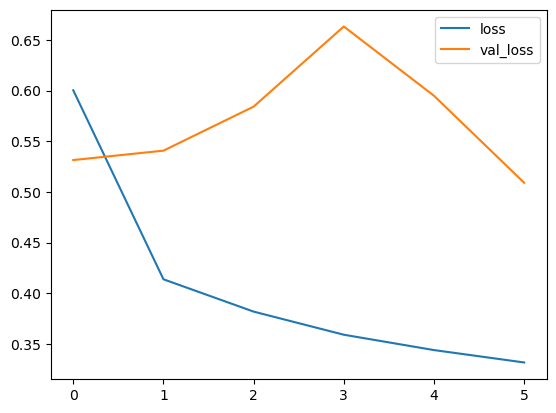

In [39]:
result = pd.DataFrame(model2.history.history)
losses = result.drop(['accuracy','val_accuracy'],axis=1)
losses.plot()

<Axes: >

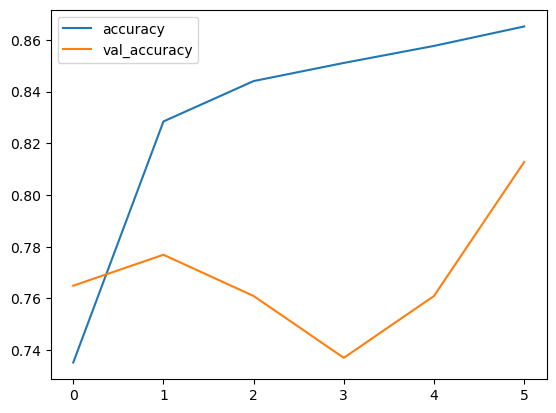

In [40]:
accuracy = result.drop(['loss','val_loss'],axis=1)
accuracy.plot()

In [42]:
print("Testing accuracy of the VGG16 Model:",accuracy['val_accuracy'].max() *100)
print("testing loss of the VGG16 Model:",losses['val_loss'].min() *100)

Testing accuracy of the VGG16 Model: 81.27490282058716
testing loss of the VGG16 Model: 50.897252559661865


***RESNETv50 MODEL***

In [429]:
from keras.applications import ResNet50V2

In [438]:
resnet_model = ResNet50V2(input_shape=(256,256,3),include_top = False,weights = 'imagenet',classes=3,pooling = 'max')

for layer in resnet_model.layers:
    layer.trainable = False

model3 = Sequential()
model3.add(resnet_model)
model3.add(Flatten())
model3.add(Dense(128, activation = "relu"))
model3.add(Dropout(0.2))
model3.add(Dense(3, activation = "softmax"))


In [439]:
model3.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [441]:
model3.fit(train_generator,validation_data = valid_generator,epochs = 15, verbose=1,batch_size=16)

Epoch 1/15


C:\Users\kush.parihar\AppData\Local\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


741/741 ━━━━━━━━━━━━━━━━━━━━ 837s 1s/step - accuracy: 0.7531 - loss: 1.1298 - val_accuracy: 0.8406 - val_loss: 0.4536
Epoch 2/15
741/741 ━━━━━━━━━━━━━━━━━━━━ 819s 1s/step - accuracy: 0.8460 - loss: 0.3818 - val_accuracy: 0.8048 - val_loss: 0.4845
Epoch 3/15
  1/741 ━━━━━━━━━━━━━━━━━━━━ 44:05 4s/step - accuracy: 0.9375 - loss: 0.1034

KeyboardInterrupt: 

In [442]:
df = pd.DataFrame(model3.history.history)

<Axes: >

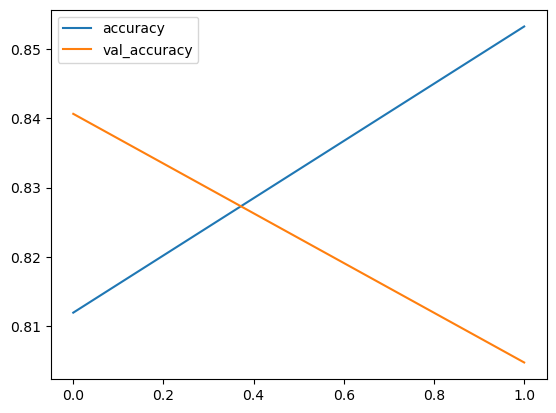

In [443]:
df_losses = df.drop(['loss','val_loss'],axis=1)
df_losses.plot()

<Axes: >

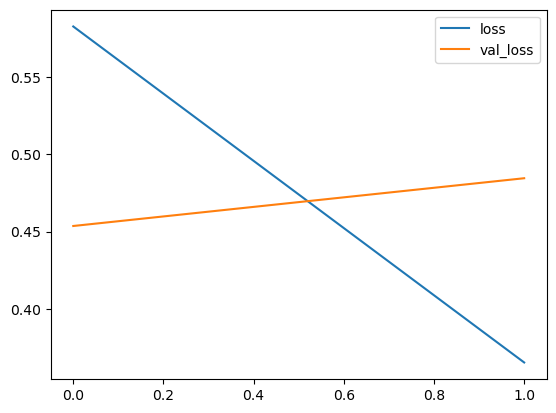

In [444]:
df_acc = df.drop(['accuracy','val_accuracy'],axis=1)
df_acc.plot()

In [445]:
print("The accuracy of ResNet Model:",df_losses['val_accuracy'].max() * 100)
print("The loss of ResNet Model:",df_acc['val_loss'].min() *100)

The accuracy of ResNet Model: 84.06374454498291
The loss of ResNet Model: 45.36046385765076


****THE RESNET MODEL IS GIVING THE HIGHEST ACCURACY, HENCE THIS MODEL WILL BE USED FOR TESTING AS WELL AS FOR FINAL PREDICTIONS****

In [446]:
from tensorflow.keras.preprocessing import image

In [469]:
path = r"C:\Users\kush.parihar\Desktop\major project\val\Covid\050.jpeg"

In [470]:
img = image.load_img(path, target_size = (256,256,3))
img = image.img_to_array(img)/255.0

img = np.array([img])
img.shape

(1, 256, 256, 3)

In [471]:
result = np.argmax(model3.predict(img))
print(result)
if result==0:
    print("COVID-19")
elif result==1:
    print("NORMAL")
elif result==2:
    print("VIRAL PNEUMONIA")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
0
COVID-19


In [473]:
model3.save("final_model.h5")

ValueError: Unable to synchronously create dataset (name already exists)

In [ ]:
loaded_model = load_model("final_model.keras")